In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Display first few rows
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


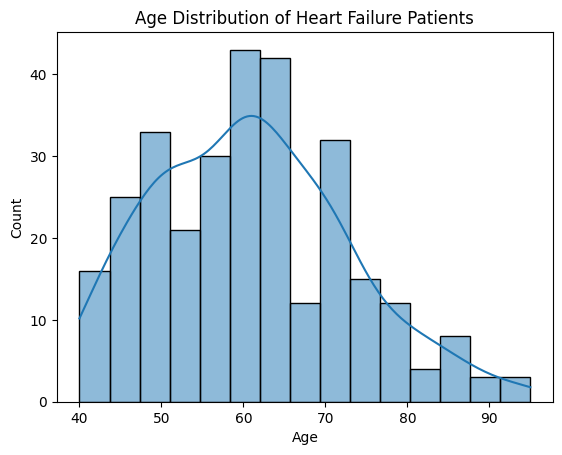

In [3]:
# 1. What is the distribution of age among heart failure patients in the dataset?
sns.histplot(df["age"], bins=15, kde=True)
plt.title("Age Distribution of Heart Failure Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


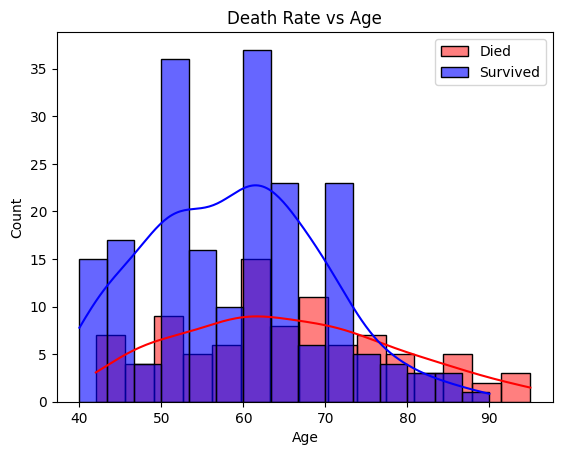

In [4]:
# 2. How does the death rate vary with age?
sns.histplot(df[df["DEATH_EVENT"] == 1]["age"], bins=15, kde=True, color="red", label="Died")
sns.histplot(df[df["DEATH_EVENT"] == 0]["age"], bins=15, kde=True, color="blue", label="Survived", alpha=0.6)
plt.title("Death Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


In [5]:
#3. What is the percentage of male and female patients in the dataset?
gender_counts = df["sex"].value_counts(normalize=True) * 100
print(f"Male: {gender_counts[1]:.2f}%, Female: {gender_counts[0]:.2f}%")


Male: 64.88%, Female: 35.12%


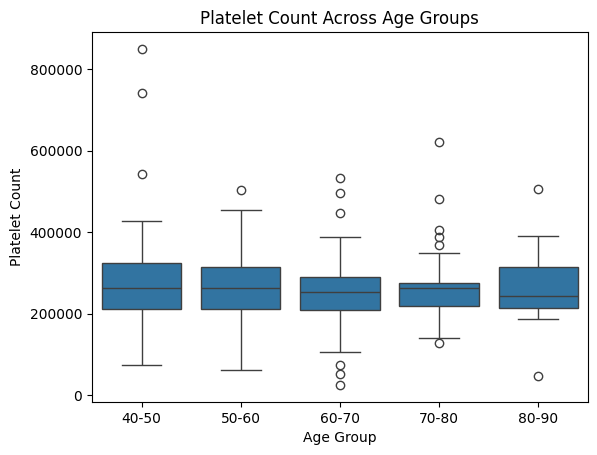

In [6]:
#4. How does the platelet count vary among different age groups?
df["age_group"] = pd.cut(df["age"], bins=[40, 50, 60, 70, 80, 90], labels=["40-50", "50-60", "60-70", "70-80", "80-90"])
sns.boxplot(x="age_group", y="platelets", data=df)
plt.title("Platelet Count Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Platelet Count")
plt.show()


Correlation coefficient: -0.19


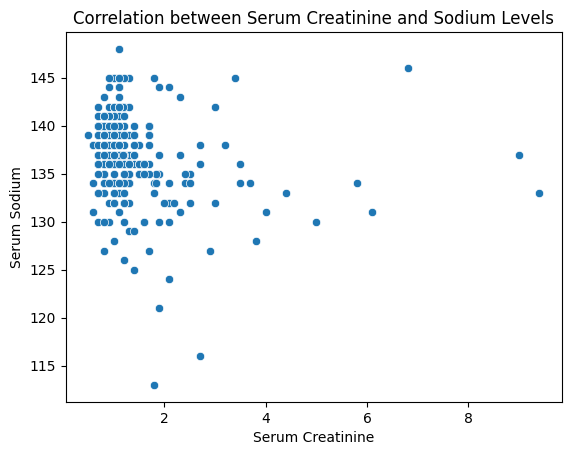

In [7]:
#5. Is there a correlation between creatinine and sodium levels in the blood?
correlation = df["serum_creatinine"].corr(df["serum_sodium"])
print(f"Correlation coefficient: {correlation:.2f}")

sns.scatterplot(x="serum_creatinine", y="serum_sodium", data=df)
plt.title("Correlation between Serum Creatinine and Sodium Levels")
plt.xlabel("Serum Creatinine")
plt.ylabel("Serum Sodium")
plt.show()


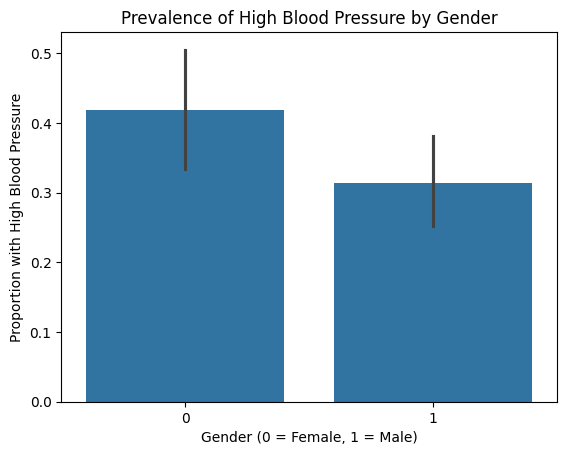

In [8]:
#6. How does the prevalence of high blood pressure differ between male and female patients?
sns.barplot(x="sex", y="high_blood_pressure", data=df)
plt.title("Prevalence of High Blood Pressure by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Proportion with High Blood Pressure")
plt.show()


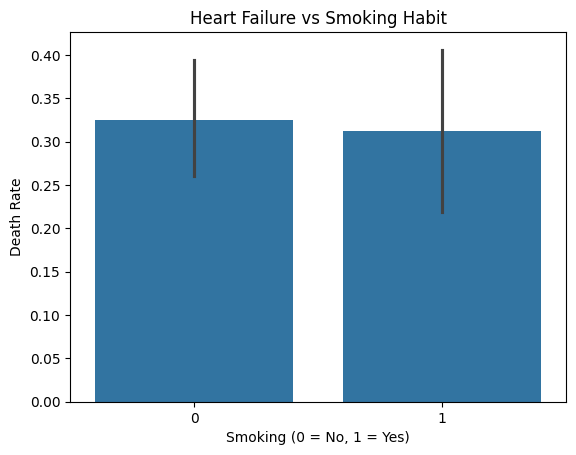

In [9]:
#7. What is the relationship between smoking habits and the occurrence of heart failure?
sns.barplot(x="smoking", y="DEATH_EVENT", data=df)
plt.title("Heart Failure vs Smoking Habit")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Death Rate")
plt.show()


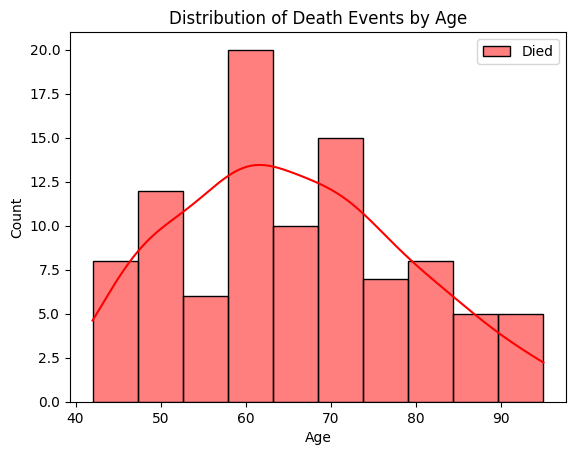

In [10]:
#8. Are there any noticeable patterns in the distribution of death events across different age groups?
sns.histplot(df[df["DEATH_EVENT"] == 1]["age"], bins=10, kde=True, color="red", label="Died")
plt.title("Distribution of Death Events by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


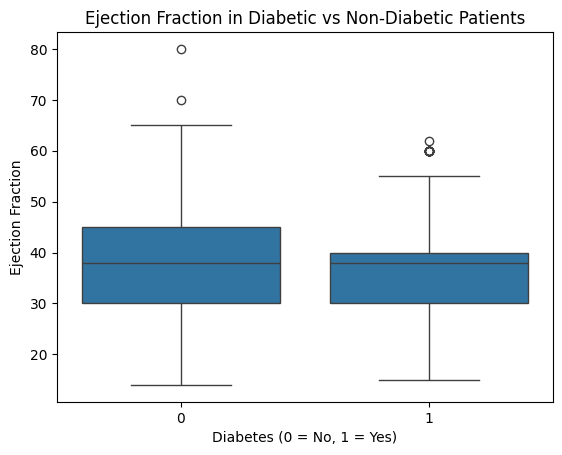

In [11]:
#9. Is there any significant difference in ejection fraction between patients with and without diabetes?
sns.boxplot(x="diabetes", y="ejection_fraction", data=df)
plt.title("Ejection Fraction in Diabetic vs Non-Diabetic Patients")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Ejection Fraction")
plt.show()


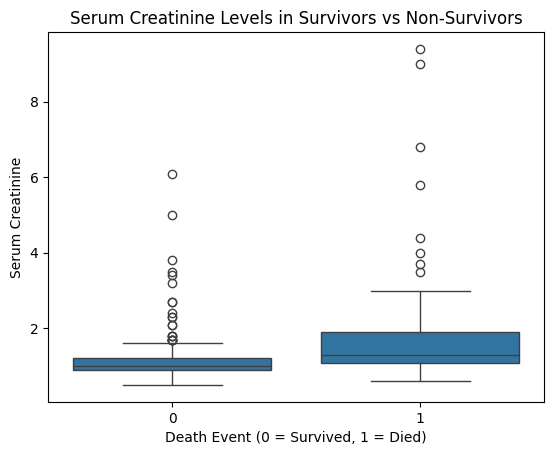

In [12]:
#10. How does the serum creatinine level vary between patients who survived and those who did not?
sns.boxplot(x="DEATH_EVENT", y="serum_creatinine", data=df)
plt.title("Serum Creatinine Levels in Survivors vs Non-Survivors")
plt.xlabel("Death Event (0 = Survived, 1 = Died)")
plt.ylabel("Serum Creatinine")
plt.show()
